In [9]:
import polars as pl
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
df = (
    pl.read_parquet("../data/processed/*.parquet")
    .group_by("ride_date")
    .agg(
        pl.col("unique_rides").sum().alias("total_rides")
    )
    .filter(pl.col("ride_date") >= datetime(2023, 1, 1))
    .sort("ride_date")
    .to_pandas()
    .set_index("ride_date")
)
df.head()

,total_rides
ride_date,
2023-01-01,50642
2023-01-02,58241
2023-01-03,51789
2023-01-04,74454
2023-01-05,71440


<Axes: xlabel='ride_date'>

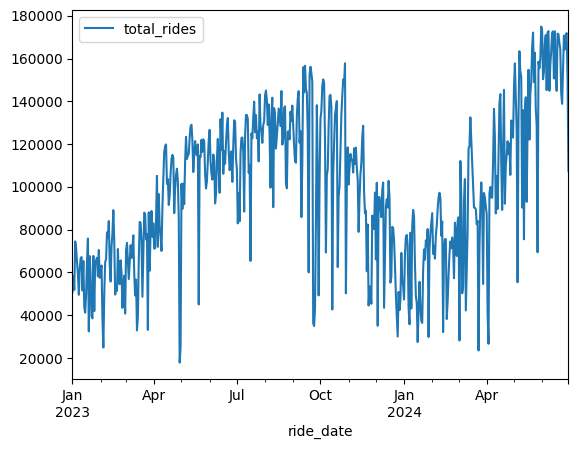

In [8]:
df.plot()

<Figure size 1000x400 with 0 Axes>

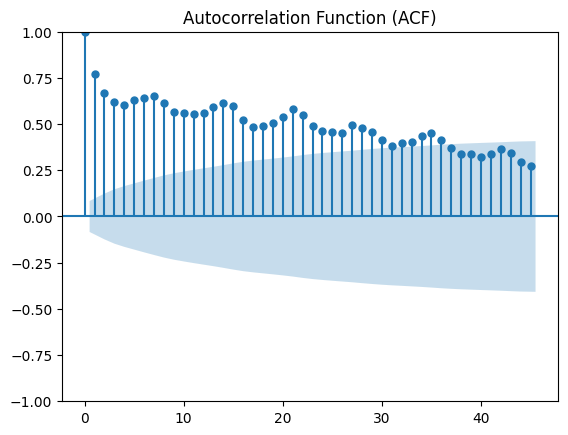

In [11]:
plt.figure(figsize=(10, 4))
plot_acf(df["total_rides"], lags=45)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x400 with 0 Axes>

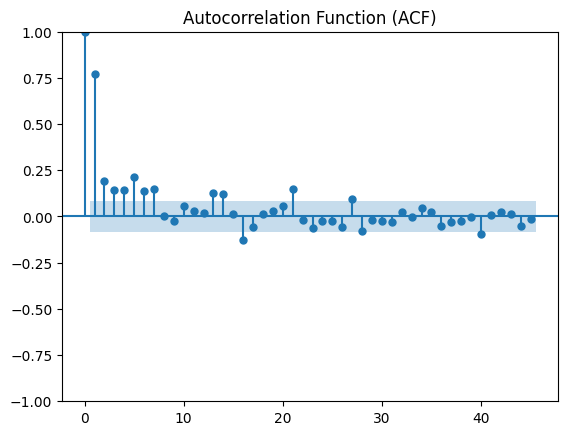

In [12]:
plt.figure(figsize=(10, 4))
plot_pacf(df["total_rides"], lags=45)
plt.title('Autocorrelation Function (ACF)')
plt.show()